<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%AD%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт необходимых библиотек**

In [59]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**Подготовка необходимых функций**

In [80]:
# Чтение данных из CSV
def read_data(file_path):
    return pd.read_csv(file_path, index_col=0, parse_dates=True)

# Проверка на стационарность
def is_stationary(time_series, alpha=0.05):
    result = adfuller(time_series)
    p_value = result[1]
    return p_value < alpha

# Разбиение данных на тренировочный и тестовый наборы
def train_test_split(time_series, test_size=0.2):
    split_index = int(len(time_series) * (1 - test_size))
    train, test = time_series[:split_index], time_series[split_index:]
    return train, test

# Метод экспоненциального сглаживания
def exponential_smoothing(train, test):
    model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
    fit_model = model.fit()
    preds = fit_model.forecast(len(test))
    return preds

# Метод скользящего среднего
def moving_average(train, window):
    return train.rolling(window=window).mean().iloc[-1]

# Основная функция
def main(stationary_file, non_stationary_file):
    # Чтение данных
    stationary_series = read_data(stationary_file)
    non_stationary_series = read_data(non_stationary_file)

    # Проверка стационарности
    assert is_stationary(stationary_series), "Стационарный ряд не является стационарным"
    assert not is_stationary(non_stationary_series), "Нестационарный ряд является стационарным"

    # Разбиение на train/test
    train_stationary, test_stationary = train_test_split(stationary_series)
    train_non_stationary, test_non_stationary = train_test_split(non_stationary_series)

    # Применение методов
    window = 4 # Размер окна для скользящего среднего
    stationary_preds = [moving_average(train_stationary[:i+window], window) for i in range(len(test_stationary))]
    non_stationary_preds = exponential_smoothing(train_non_stationary, test_non_stationary)

    # Оценка качества предсказаний
    stationary_mse = mean_squared_error(test_stationary, stationary_preds)
    non_stationary_mse = mean_squared_error(test_non_stationary, non_stationary_preds)

    print(f"Stationary series MSE: {stationary_mse}")
    print(f"Non-stationary series MSE: {non_stationary_mse}")

    # Визуализация
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(stationary_series, label='Original')
    plt.plot(test_stationary.index, stationary_preds, label='Predicted', linestyle='--')
    plt.title('Stationary Series')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(non_stationary_series, label='Original')
    plt.plot(test_non_stationary.index, non_stationary_preds, label='Predicted', linestyle='--')
    plt.title('Non-Stationary Series')
    plt.legend()

    plt.tight_layout()
    plt.show()

**Загрузка данных и вывод результата**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Stationary series MSE: 71.84417808219177
Non-stationary series MSE: 1541.3957425312913


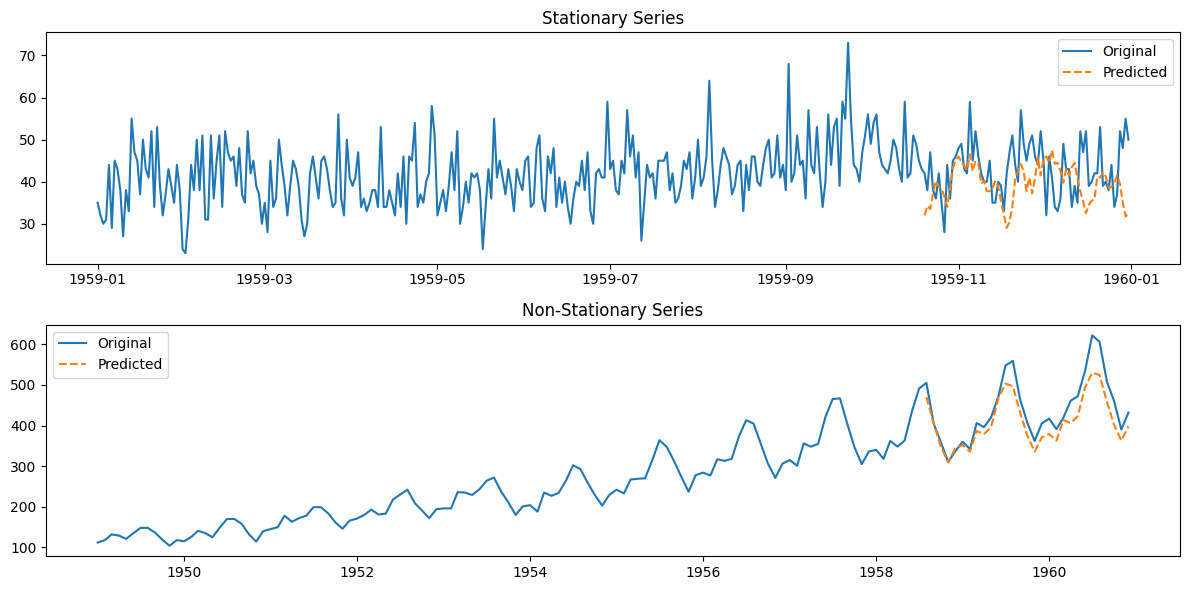

In [81]:
station_file = "https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/daily-total-female-births-in-cal.csv"
non_station_file = "https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/international-airline-passengers.csv"
main(station_file, non_station_file)

**Выводы**

Для каждой модели применили свой метод сглаживания и сделали предсказания.

Можем заметить, что значение функции потерь достаточно большие, но визуально предсказания временных рядов имеют схожую природу с оригинальными значениями, особенно для нестационарного ряда.

Текущие модели были выбраны случайным образом, чтобы проверить качество предсказания временного ряда.

Можно настроить размер окна для метода скользящего среднего стационарного ряда, чтобы улучшить качество предсказаний, а для нестационарного ряда можно использовать другую модель, например метод Хольта-Винтерса, т.к. данный временной ряд имеет и тред и сезонность.